# Predicting JKSE Index Using Support Vector Regression

in this project i will try to use the Support Vector Regression to predict future rates of the JKSE (IHSG) index

 #### first, we import the relevant packages and modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

#### we then read the data we want to use

In [2]:
data= pd.read_csv(r'C:\Users\edgar\Desktop\stuff\tutorial python\datasets\^JKSE.csv', )

data['Date']=pd.to_datetime(data['Date'])
data['Harga Esok']= data['Close']

#### print the first 5 rows and the descriptive statistics of each column

#### check the types of the data, in this case, we'd want the prices as floats and volume as integers

#### also check if there are missing values in the data, if there are some, we'll have to drop them or impute them

In [ ]:
print(data.head())
print(data.describe())
print(data.dtypes)
data.isna().sum()

#### Plot the closing price along the time as the x-axis

[Text(0, 0.5, 'Nilai (Rp)')]

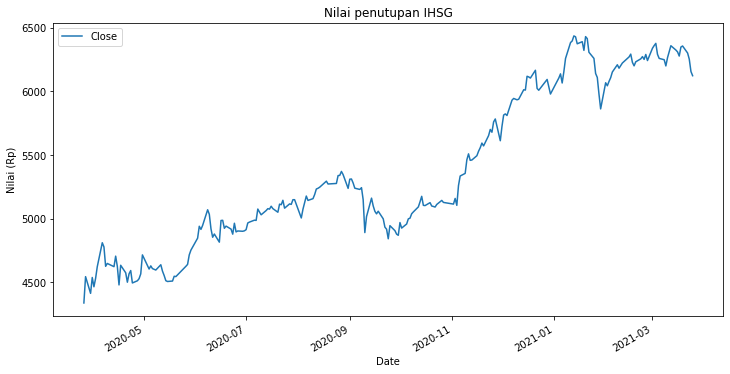

In [3]:
fig, ax = plt.subplots(figsize=(12,6))
data.plot('Date', 'Close', ax=ax)
ax.set(title='Nilai penutupan IHSG')
ax.set(ylabel='Nilai (Rp)')

#### We create the X (inputs) and y (output) arrays

In [4]:
n= int(input('Jumlah hari yang ingin diprediksi:'))

X= data.drop(['Date', 'Adj Close', 'Harga Esok'], axis=1)[:-n]
print(X.shape)
y=data['Harga Esok'][:-n]
print(y.shape)

print(X)
print(y)



Jumlah hari yang ingin diprediksi:25
(215, 5)
(215,)
            Open         High          Low        Close     Volume
0    3937.632080  4370.660156  3935.914063  4338.903809   81100100
1    4338.903809  4697.666016  4338.903809  4545.570801   77851100
2    4545.570801  4545.570801  4317.713867  4414.500000   27552200
3    4414.500000  4569.473145  4414.500000  4538.930176   43426600
4    4538.930176  4627.417969  4445.138184  4466.037109   41848000
..           ...          ...          ...          ...        ...
210  6198.032227  6216.938965  6168.013184  6201.828125  122608700
211  6221.633789  6232.850098  6194.009766  6222.520996  104014000
212  6244.384766  6283.415039  6244.384766  6270.324219  123956100
213  6291.007813  6308.811035  6274.353027  6292.395996  144173700
214  6292.970215  6314.555176  6209.314941  6227.728027  169907100

[215 rows x 5 columns]
0      4338.903809
1      4545.570801
2      4414.500000
3      4538.930176
4      4466.037109
          ...     
210  

#### Everything looks fine and dandy! or does it? we'll check the correlation between the input variables first, since highly correlated data can cause bias in the model

In [5]:
X.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.995846,0.996387,0.992244,0.833363
High,0.995846,1.000000,0.994185,0.996897,0.846650
Low,0.996387,0.994185,1.000000,0.995645,0.834197
Close,0.992244,0.996897,0.995645,1.000000,0.844885
Volume,0.833363,0.846650,0.834197,0.844885,1.000000


#### Apparently, the inputs are all highly correlated. We'll reduce the number of input to just one and see how it'll perform on the model.

In [6]:
X=X.drop(['Open', 'High', 'Low', 'Volume'], axis=1)

#### Here, we instantiate the SVR model, with all the default hyperparameters and divide the data into training set and test set.

In [9]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
svr = SVR('linear')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

print(svr.score(X_train, y_train))
print(svr.score(X_test, y_test))




0.9999999905019354
0.9999999904548227


C:\Users\edgar\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass kernel=linear as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


#### Voila! the model worked quite well on both the training set and test set, giving us the coefficient of determination of 0,999 or 99.9% on both sets.